# Collaborative Filtering

- Collaborative filtering is a straightforward approach to **recommender systems**. In a nutshell it gets recommendations by copying from the most similar entities:

https://towardsdatascience.com/various-implementations-of-collaborative-filtering-100385c6dfe0


## Cosine similarity
- Cosine Similarity used to determine similarity of movie ratings, 0 being totally dissimilar, 1 being the exact same ratings

As an Euclidean similarity measure, cosine similarity is commonly used:

\begin{align}
cos(X, Y) = \frac{X*Y}{\left||X |\right| * \left||Y |\right|}
\end{align}

Or, in more detail:

\begin{align}
cos(X, Y) = \frac{\sum_i^n{X_i*Y_i}}{\sqrt{\sum_i{X_i^2}}*\sqrt{\sum_i{Y_i^2}}}
\end{align}

## Read your movie data

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('peppermint_movies - Sheet1.csv')
movies = df.set_index(['Reviewer', 'Movie'])['Rating'].unstack()
movies.fillna(0.0, inplace=True)
movies # Now we have a nice movie matrix!

Movie,A Star Is Born,Argo,Bohemian Rhapsody,Das Leben der Anderen,Dirty Dancing,Dora the Explorer,Guesthouse Paradiso,Harry Potter and the Sorcerer's Stone,High School Musical 4,IT,...,Power Rangers,Princess Diaries,Roma,Schindlers List,Shawshank Redemption,Titanic,Toxic Avenger,Trainspotting,Who am I,Zootopia
Reviewer,,,,,,,,,,,,,,,,,,,,,
Anders,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Josh,4.0,3.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Karl,0.0,5.0,4.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
Max,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,...,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Michael,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,5.0,0.0
Nedra,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,5.0,0.0,2.0,0.0,4.0,0.0,0.0
Paul,4.0,5.0,5.0,5.0,0.0,2.0,0.0,4.0,2.0,4.0,...,0.0,0.0,1.0,0.0,5.0,5.0,2.0,4.0,0.0,0.0


## Implement a Cosine Similarity function

In [3]:
karl = movies.loc['Karl']
paul = movies.loc['Paul']

np.dot(karl,paul)

93.0

#### We have calculated the dot product of the sum of all the film ratings - for Karl and Paul

In [4]:
def cosim(x, y):
    '''Returns the cosine similarity of two vectors'''
    num = np.dot(x,y) #numerator
    
    xsum = math.sqrt(sum(x ** 2))
    ysum = math.sqrt(sum(y ** 2))
    denom = xsum * ysum
    return num / denom

In [5]:
# from the example done on the board
x = np.array([3, 2, 0, 1])
y = np.array([5, 4, 2, 0])
cosim(x, y)

0.9163419338230351

In [6]:
# Here we would expect 1 as they are the same! So can make an assertion 
# to check that your function is correct
assert cosim(x, x) == 1.0
print(cosim(x, x))

1.0


## Calculate Cosine Similarity of two people

In [8]:
karl = movies.loc['Karl']
paul = movies.loc['Paul']

cosim(karl, paul)

0.697534877615843

## Calculate an all vs. all in what we call a similarity matrix
- Pattern to calculate matrices is to do a **for loop within a for loop (NESTED)**

In [9]:
movies

Movie,A Star Is Born,Argo,Bohemian Rhapsody,Das Leben der Anderen,Dirty Dancing,Dora the Explorer,Guesthouse Paradiso,Harry Potter and the Sorcerer's Stone,High School Musical 4,IT,...,Power Rangers,Princess Diaries,Roma,Schindlers List,Shawshank Redemption,Titanic,Toxic Avenger,Trainspotting,Who am I,Zootopia
Reviewer,,,,,,,,,,,,,,,,,,,,,
Anders,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Josh,4.0,3.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Karl,0.0,5.0,4.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
Max,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,...,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Michael,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,5.0,0.0
Nedra,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,5.0,0.0,2.0,0.0,4.0,0.0,0.0
Paul,4.0,5.0,5.0,5.0,0.0,2.0,0.0,4.0,2.0,4.0,...,0.0,0.0,1.0,0.0,5.0,5.0,2.0,4.0,0.0,0.0


In [10]:
matrix = []
for name1 in movies.index:
    row = []
    for name2 in movies.index:
        x = movies.loc[name1]
        y = movies.loc[name2]
        row.append(cosim(x, y))
    matrix.append(row)

similarity_matrix = pd.DataFrame(matrix, index=movies.index, 
                                 columns=movies.index)
similarity_matrix

Reviewer,Anders,Josh,Karl,Max,Michael,Nedra,Paul
Reviewer,,,,,,,
Anders,1.000000,0.137038,0.061546,0.282138,0.000000,0.000000,0.081244
Josh,0.137038,1.000000,0.265674,0.000000,0.000000,0.000000,0.325656
Karl,0.061546,0.265674,1.000000,0.065117,0.000000,0.629253,0.697535
Max,0.282138,0.000000,0.065117,1.000000,0.082367,0.000000,0.085958
Michael,0.000000,0.000000,0.000000,0.082367,1.000000,0.028427,0.085386
Nedra,0.000000,0.000000,0.629253,0.000000,0.028427,1.000000,0.585909
Paul,0.081244,0.325656,0.697535,0.085958,0.085386,0.585909,1.000000


## Plot a heatmap

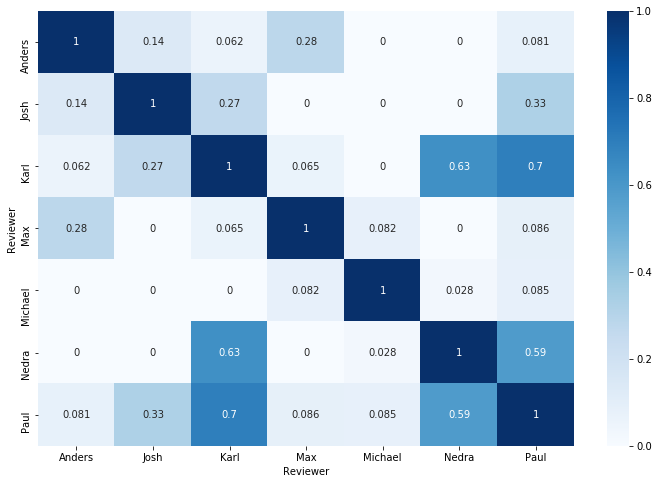

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(similarity_matrix, annot=True, cmap='Blues')

## Query for a new user

In [12]:
movies.columns

Index(['A Star Is Born', 'Argo', 'Bohemian Rhapsody', 'Das Leben der Anderen',
       'Dirty Dancing', 'Dora the Explorer', 'Guesthouse Paradiso',
       'Harry Potter and the Sorcerer's Stone', 'High School Musical 4', 'IT',
       'Inside Out', 'Murder on the Orient Express', 'Power Rangers',
       'Princess Diaries', 'Roma', 'Schindlers List', 'Shawshank Redemption',
       'Titanic', 'Toxic Avenger', 'Trainspotting', 'Who am I', 'Zootopia'],
      dtype='object', name='Movie')

In [13]:
my_movies = {'A Star Is Born': 2.5, 
             'Bohemian Rhapsody': 4.0, 
             'Dora the Explorer': 1.0, 
             'Schindlers List': 5.0
            }

In [15]:
# build a list with all movies, filling up with zeroes
daniela = []
for m in movies.columns:
    if m in my_movies:
        rating = my_movies[m]
    else:
        rating = 0.0
    daniela.append(rating)

daniela = np.array(daniela)
daniela

array([2.5, 0. , 4. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 5. , 0. , 0. , 0. , 0. , 0. , 0. ])

In [17]:
# find most similar user
for user in movies.index:
    value = cosim(daniela, movies.loc[user])
    print(f'{user:10} {value:10.3f}')

Anders          0.000
Josh            0.171
Karl            0.246
Max             0.088
Michael         0.000
Nedra           0.683
Paul            0.324


In [19]:
# print top movies of that user
movies.loc['Nedra'].sort_values(ascending=False).head()

Movie
Bohemian Rhapsody        5.0
Schindlers List          5.0
Trainspotting            4.0
Das Leben der Anderen    4.0
Titanic                  2.0
Name: Nedra, dtype: float64

### Advantages of Collaborative Filtering

* fast
* works for huge datasets
* works with other types of features (genres, demography)
* application: similar users in a social network (user-based CF)
* variation: item-based collaborative filtering --> e-commerce
* *"people who watched X also watched Y"*

## Same thing in Scikit

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
cosine_similarity(movies)

array([[1.        , 0.13703774, 0.06154575, 0.28213825, 0.        ,
        0.        , 0.08124445],
       [0.13703774, 1.        , 0.26567383, 0.        , 0.        ,
        0.        , 0.3256565 ],
       [0.06154575, 0.26567383, 1.        , 0.06511653, 0.        ,
        0.6292532 , 0.69753488],
       [0.28213825, 0.        , 0.06511653, 1.        , 0.08236662,
        0.        , 0.08595812],
       [0.        , 0.        , 0.        , 0.08236662, 1.        ,
        0.02842676, 0.08538577],
       [0.        , 0.        , 0.6292532 , 0.        , 0.02842676,
        1.        , 0.58590898],
       [0.08124445, 0.3256565 , 0.69753488, 0.08595812, 0.08538577,
        0.58590898, 1.        ]])

In [22]:
sim_matrix = pd.DataFrame(cosine_similarity(movies), index=movies.index, columns=movies.index)
sim_matrix

Reviewer,Anders,Josh,Karl,Max,Michael,Nedra,Paul
Reviewer,,,,,,,
Anders,1.000000,0.137038,0.061546,0.282138,0.000000,0.000000,0.081244
Josh,0.137038,1.000000,0.265674,0.000000,0.000000,0.000000,0.325656
Karl,0.061546,0.265674,1.000000,0.065117,0.000000,0.629253,0.697535
Max,0.282138,0.000000,0.065117,1.000000,0.082367,0.000000,0.085958
Michael,0.000000,0.000000,0.000000,0.082367,1.000000,0.028427,0.085386
Nedra,0.000000,0.000000,0.629253,0.000000,0.028427,1.000000,0.585909
Paul,0.081244,0.325656,0.697535,0.085958,0.085386,0.585909,1.000000


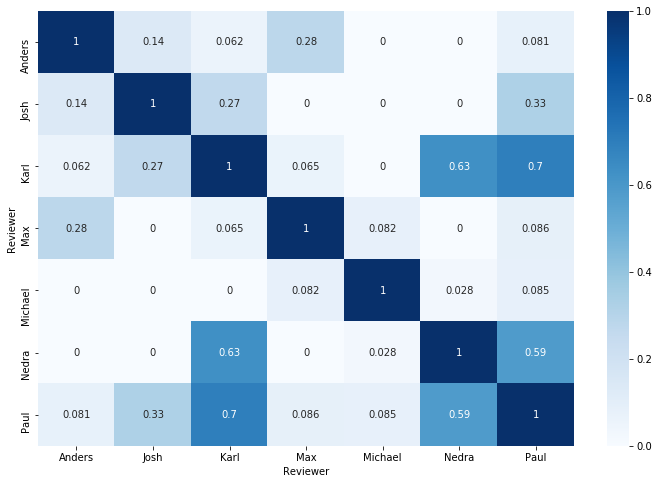

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(sim_matrix, annot=True, cmap='Blues')

## See also

* Tanimoto Coefficient
* Jaccard Index

### Tanimoto coefficient
For binary variables you might use the Tanimoto coefficient (also see Jaccard Index). It uses the number of bits:

\begin{align}
cos(X, Y) = \frac{nbits(X \cap Y)}{nbits(X) * nbits(Y) - nbits(X \cap Y)}
\end{align}

### User-based Collaborative Filtering
- Find the N most similar users. Aggregate their ratings on the items to be ranked.

### Item-based Collaborative Filtering

- “Users who bought X also bought Y”

Create a similarity matrix of items and find the N most similar items to those rated by an user.